# DNA sequencing with Machine Learning

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
human_data=pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


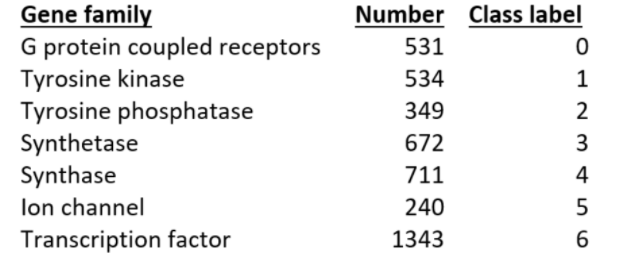

In [23]:
from IPython.display import Image
Image("Classifier.png")

##Apply k-mers to the complete sequences

In [24]:
def getkmers(sequence,size=6):
    return [sequence[x:x+size].lower()for x in range(len(sequence)-size+1)]

In [25]:
#convert the sequence data to words

In [26]:
human_data['words']=human_data.apply(lambda x: getkmers(x['sequence']),axis=1)
human_data=human_data.drop('sequence',axis=1)

In [27]:
human_data.head(5)

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [28]:
#to use count vectorizer we need to convert this list of owrds to text data for 
# applying count vectorizer

In [29]:
human_texts=list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item]=' '.join(human_texts[item])
y_data=human_data.iloc[:,0].values   

In [30]:
#Apply BAG of words using Countvectoriser

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(4,4))
X=cv.fit_transform(human_texts)

In [32]:
X.shape

(4380, 232414)

In [33]:
#class balance

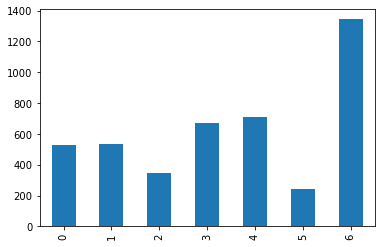

In [34]:
human_data['class'].value_counts().sort_index().plot.bar()

In [35]:
#Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y_data,
                                                 test_size=0.20,random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [37]:
##Multinomial Naive Bayes Classifier ##
#The alpha papameter was determined by grid search previously

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [39]:
y_pred=classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_pred,name='Predicted')))

def get_metrics(y_test,y_predict):
    accuracy=accuracy_score(y_test,y_predict)
    precision=precision=precision_score(y_test,y_predict,average='weighted')
    recall=recall_score(y_test,y_predict,average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
